In [1]:
# Libraries and functions
import sys
sys.path.append("../functions/")
from plot import plot_posterior_distributions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


# global variables
model_list = ['0', 'I', 'B', 'IB', 'C', 'CI', 'CB', 'CIB']                                 # list of strings with model codes
path_simulations = '../runs/raw/'                                                          # path where to find simulations

In [2]:
# Load the population array (Nij)
with open('../data/population/Nij.json', 'r') as f:
    Nij = np.array(json.load(f))

threshold = 0.2                                                                            # Threshold of calibration metric for acceptance

initial_cases = 10119                                                                      # Observed initial number of individuals in L and I compartments (14th Septemeber)

In [3]:
best_simulations_dict = {}

# Import simulations and select the ones with smallest error
for model_string in model_list:
    file_name = f"simulations_model_{model_string}.csv"
    df_params = pd.read_csv(path_simulations + file_name)
    df_params = df_params[df_params['err']<=threshold].reset_index(drop=True)
    best_simulations_dict[model_string] = df_params

Figure saved to ../outputs/Posterior_distributions.png


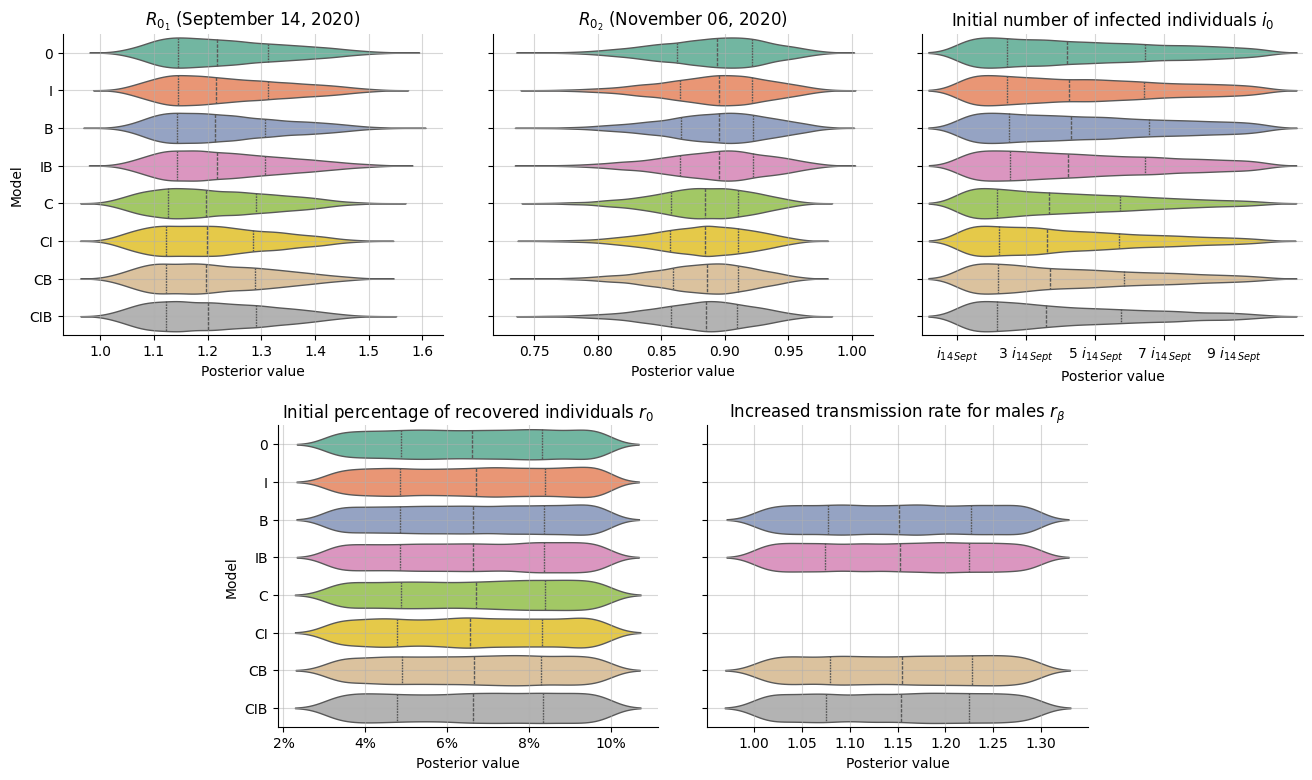

In [4]:
# --- Call Plotting Function ---
plot_posterior_distributions(best_simulations_dict, model_list, Nij, initial_cases, save_path='../outputs/Posterior_distributions.png')